In [1]:
import pandas as pd
import requests

In [2]:
url = "https://dadosabertos.camara.leg.br/api/v2/deputados?ordem=ASC&ordenarPor=nome"
resultado = requests.get(url)

In [5]:
resultado.json()

{'dados': [{'id': 220593,
   'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/220593',
   'nome': 'Abilio Brunini',
   'siglaPartido': 'PL',
   'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/37906',
   'siglaUf': 'MT',
   'idLegislatura': 57,
   'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/220593.jpg',
   'email': 'dep.abiliobrunini@camara.leg.br'},
  {'id': 204379,
   'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/204379',
   'nome': 'Acácio Favacho',
   'siglaPartido': 'MDB',
   'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/36899',
   'siglaUf': 'AP',
   'idLegislatura': 57,
   'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/204379.jpg',
   'email': 'dep.acaciofavacho@camara.leg.br'},
  {'id': 220714,
   'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/220714',
   'nome': 'Adail Filho',
   'siglaPartido': 'REPUBLICANOS',
   'uriPartido': 'https://dadosabertos.camara.leg.br/api/v

In [8]:
deputados = pd.DataFrame(resultado.json()['dados'])
deputados

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,220593,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
1,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
2,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br
3,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br
4,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br
...,...,...,...,...,...,...,...,...,...
507,220558,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Trovão,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SC,57,https://www.camara.leg.br/internet/deputado/ba...,dep.zetrovao@camara.leg.br
508,204517,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Vitor,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MG,57,https://www.camara.leg.br/internet/deputado/ba...,dep.zevitor@camara.leg.br
509,160592,https://dadosabertos.camara.leg.br/api/v2/depu...,Zeca Dirceu,PT,https://dadosabertos.camara.leg.br/api/v2/part...,PR,57,https://www.camara.leg.br/internet/deputado/ba...,dep.zecadirceu@camara.leg.br
510,220592,https://dadosabertos.camara.leg.br/api/v2/depu...,Zezinho Barbary,PP,https://dadosabertos.camara.leg.br/api/v2/part...,AC,57,https://www.camara.leg.br/internet/deputado/ba...,dep.zezinhobarbary@camara.leg.br


In [9]:
deputados.shape # 512 deputados e 9 colunas

(512, 9)

In [11]:
gastos = []
for id in deputados.id:
    url_despesa = "https://dadosabertos.camara.leg.br/api/v2/deputados/"+str(id)+"/despesas?ordem=ASC&ordenarPor=ano"
    resposta = requests.get(url_despesa)
    gasto = pd.DataFrame(resposta.json()['dados'])
    gasto['id']=id
    gastos.append(gasto)

In [13]:
gastos[0]

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela,id
0,2023,9,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7610066,Nota Fiscal Eletrônica,4,2023-09-19,35537,52.98,http://www.camara.leg.br/cota-parlamentar/nota...,3XIS COMERCIO VAREJISTA E ATACADISTA DE PAPELA...,42999796000188,52.98,0.0,,1969221,0,220593
1,2023,11,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7657491,Nota Fiscal,0,2023-11-27,01,67.30,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,67.30,0.0,,1996163,0,220593
2,2023,12,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7671693,Nota Fiscal,0,2023-12-26,11533122023001,67.30,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,67.30,0.0,,2003936,0,220593
3,2023,12,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7664938,Nota Fiscal,0,2023-12-13,368,1050.00,https://www.camara.leg.br/cota-parlamentar/doc...,BROAD BRASIL LTDA,48949641000113,1050.00,0.0,,2000174,0,220593
4,2023,9,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7609716,Nota Fiscal,0,2023-09-18,229,850.00,https://www.camara.leg.br/cota-parlamentar/doc...,BROADBRASIL LTDA,48949641000113,850.00,0.0,,1969042,0,220593
5,2023,11,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7657503,Nota Fiscal,0,2023-11-13,01,2033.08,https://www.camara.leg.br/cota-parlamentar/doc...,ENERGISA MATO GROSSO - DISTRIBUIDORA DE ENERGI...,03467321000199,2033.08,0.0,,1996163,0,220593
6,2023,9,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7625748,Nota Fiscal,0,2023-09-14,015345314,2070.45,https://www.camara.leg.br/cota-parlamentar/doc...,ENERGISA MATO GROSSO - DISTRIBUIDORA DE ENERGI...,03467321000199,2070.45,0.0,,1978242,0,220593
7,2023,12,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7671906,Nota Fiscal,0,2023-12-14,23036040,1852.99,https://www.camara.leg.br/cota-parlamentar/doc...,ENERGISA MATO GROSSO - DISTRIBUIDORA DE ENERGI...,03467321000199,1852.99,0.0,,2004057,0,220593
8,2023,11,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7645134,Recibos/Outros,1,2023-11-10,01,8320.00,https://www.camara.leg.br/cota-parlamentar/doc...,VYP GESTÃO DE NEGÓCIOS IMOBILIARIOS LTDA,12291615000101,8320.00,0.0,,1989179,0,220593
9,2023,12,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7654309,Recibos/Outros,1,2023-12-05,01,8320.00,https://www.camara.leg.br/cota-parlamentar/doc...,VYP GESTÃO DE NEGÓCIOS IMOBILIARIOS LTDA,12291615000101,8320.00,0.0,,1993917,0,220593


# Transformação dos dados

In [15]:
total = pd.concat(gastos)

In [16]:
total.head()

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela,id
0,2023.0,9.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7610066.0,Nota Fiscal Eletrônica,4.0,2023-09-19,35537,52.98,http://www.camara.leg.br/cota-parlamentar/nota...,3XIS COMERCIO VAREJISTA E ATACADISTA DE PAPELA...,42999796000188,52.98,0.0,,1969221.0,0.0,220593
1,2023.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7657491.0,Nota Fiscal,0.0,2023-11-27,01,67.30,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,67.30,0.0,,1996163.0,0.0,220593
2,2023.0,12.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7671693.0,Nota Fiscal,0.0,2023-12-26,11533122023001,67.30,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS CUIABA S.A,14995581000153,67.30,0.0,,2003936.0,0.0,220593
3,2023.0,12.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7664938.0,Nota Fiscal,0.0,2023-12-13,368,1050.00,https://www.camara.leg.br/cota-parlamentar/doc...,BROAD BRASIL LTDA,48949641000113,1050.00,0.0,,2000174.0,0.0,220593
4,2023.0,9.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7609716.0,Nota Fiscal,0.0,2023-09-18,229,850.00,https://www.camara.leg.br/cota-parlamentar/doc...,BROADBRASIL LTDA,48949641000113,850.00,0.0,,1969042.0,0.0,220593


In [17]:
total.sample(3)

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela,id
3,2023.0,9.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7614793.0,Nota Fiscal,0.0,2023-09-26,00000047,3670.00,https://www.camara.leg.br/cota-parlamentar/doc...,FERMED - IMPORTAÇÃO COMERCIO E MANUTENÇÃO DE E...,11399921000195,3670.00,0.00,,1971644.0,0.0,92776
4,2023.0,9.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7630608.0,Nota Fiscal,0.0,2023-10-10,0016717689,424.63,https://www.camara.leg.br/cota-parlamentar/doc...,CLARO NEXTEL TELECOMUNICAÇÕES S.A,66970229002100,417.25,7.38,,1980929.0,0.0,160556
4,2023.0,10.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7638008.0,Recibos/Outros,1.0,2023-11-01,10,3800.00,https://www.camara.leg.br/cota-parlamentar/doc...,Lúcia Calich,93175795749,3800.00,0.00,,1984721.0,0.0,220621


In [19]:
# Valores ausentes? 
total.isnull().sum()

ano                    0
mes                    0
tipoDespesa            0
codDocumento           0
tipoDocumento          0
codTipoDocumento       0
dataDocumento          0
numDocumento           0
valorDocumento         0
urlDocumento         265
nomeFornecedor         0
cnpjCpfFornecedor      0
valorLiquido           0
valorGlosa             0
numRessarcimento       0
codLote                0
parcela                0
id                     0
dtype: int64

In [20]:
del total['urlDocumento']

In [21]:
total.head()

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela,id
0,2023.0,9.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7610066.0,Nota Fiscal Eletrônica,4.0,2023-09-19,35537,52.98,3XIS COMERCIO VAREJISTA E ATACADISTA DE PAPELA...,42999796000188,52.98,0.0,,1969221.0,0.0,220593
1,2023.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7657491.0,Nota Fiscal,0.0,2023-11-27,01,67.30,AGUAS CUIABA S.A,14995581000153,67.30,0.0,,1996163.0,0.0,220593
2,2023.0,12.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7671693.0,Nota Fiscal,0.0,2023-12-26,11533122023001,67.30,AGUAS CUIABA S.A,14995581000153,67.30,0.0,,2003936.0,0.0,220593
3,2023.0,12.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7664938.0,Nota Fiscal,0.0,2023-12-13,368,1050.00,BROAD BRASIL LTDA,48949641000113,1050.00,0.0,,2000174.0,0.0,220593
4,2023.0,9.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7609716.0,Nota Fiscal,0.0,2023-09-18,229,850.00,BROADBRASIL LTDA,48949641000113,850.00,0.0,,1969042.0,0.0,220593


In [29]:
total.numRessarcimento.value_counts()

numRessarcimento
     7463
0     186
Name: count, dtype: int64

In [31]:
total.shape

(7649, 17)

In [32]:
del total['numRessarcimento']

In [33]:
total.head()

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,codLote,parcela,id
0,2023.0,9.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7610066.0,Nota Fiscal Eletrônica,4.0,2023-09-19,35537,52.98,3XIS COMERCIO VAREJISTA E ATACADISTA DE PAPELA...,42999796000188,52.98,0.0,1969221.0,0.0,220593
1,2023.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7657491.0,Nota Fiscal,0.0,2023-11-27,01,67.30,AGUAS CUIABA S.A,14995581000153,67.30,0.0,1996163.0,0.0,220593
2,2023.0,12.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7671693.0,Nota Fiscal,0.0,2023-12-26,11533122023001,67.30,AGUAS CUIABA S.A,14995581000153,67.30,0.0,2003936.0,0.0,220593
3,2023.0,12.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7664938.0,Nota Fiscal,0.0,2023-12-13,368,1050.00,BROAD BRASIL LTDA,48949641000113,1050.00,0.0,2000174.0,0.0,220593
4,2023.0,9.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7609716.0,Nota Fiscal,0.0,2023-09-18,229,850.00,BROADBRASIL LTDA,48949641000113,850.00,0.0,1969042.0,0.0,220593


In [35]:
print(total.shape)
total.drop_duplicates()
print(total.shape)

(7649, 16)
(7649, 16)


In [36]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7649 entries, 0 to 14
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ano                7649 non-null   float64
 1   mes                7649 non-null   float64
 2   tipoDespesa        7649 non-null   object 
 3   codDocumento       7649 non-null   float64
 4   tipoDocumento      7649 non-null   object 
 5   codTipoDocumento   7649 non-null   float64
 6   dataDocumento      7649 non-null   object 
 7   numDocumento       7649 non-null   object 
 8   valorDocumento     7649 non-null   float64
 9   nomeFornecedor     7649 non-null   object 
 10  cnpjCpfFornecedor  7649 non-null   object 
 11  valorLiquido       7649 non-null   float64
 12  valorGlosa         7649 non-null   float64
 13  codLote            7649 non-null   float64
 14  parcela            7649 non-null   float64
 15  id                 7649 non-null   int64  
dtypes: float64(9), int64(1), object

In [37]:
total.describe()

,ano,mes,codDocumento,codTipoDocumento,valorDocumento,valorLiquido,valorGlosa,codLote,parcela,id
count,7649.000000,7649.000000,7.649000e+03,7649.000000,7649.000000,7649.000000,7649.000000,7.649000e+03,7649.000000,7649.000000
mean,2023.014381,10.366715,7.463037e+06,1.566349,1977.602020,1959.800830,9.134839,1.940180e+06,0.002876,180208.954635
std,0.119063,1.516574,1.147188e+06,1.764679,5046.736171,5022.509524,78.551837,3.065167e+05,0.053556,50255.369406
min,2023.000000,1.000000,0.000000e+00,0.000000,-2180.480000,-2180.480000,0.000000,0.000000e+00,0.000000,62881.000000
25%,2023.000000,10.000000,7.626786e+06,0.000000,200.000000,200.000000,0.000000,1.978812e+06,0.000000,160545.000000
50%,2023.000000,10.000000,7.643236e+06,1.000000,380.000000,374.200000,0.000000,1.988201e+06,0.000000,204453.000000
75%,2023.000000,11.000000,7.659886e+06,4.000000,1600.000000,1574.380000,0.000000,1.997588e+06,0.000000,220592.000000
max,2024.000000,12.000000,7.699547e+06,4.000000,164900.000000,164900.000000,2287.000000,2.020018e+06,1.000000,227660.000000


In [44]:
total.nomeFornecedor.value_counts()

nomeFornecedor
031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA    205
063 - 311 SUL - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA      165
WMS COMERCIO DE ARTIGOS DE PAPELARIA LTDA-ME                140
AUTO POSTO 303 NORTE LTDA                                   135
AMORETTO CAFES EXPRESSO LTDA                                125
                                                           ... 
DANIEL DA SILVA FIUZA                                         1
MAXPRINT DISTRIBUIDORA LTDA                                   1
MAXPRINT DISTRIBUIDORA LTDA.                                  1
LINQ TELECOM LTDA                                             1
CASA DO CARTUCHO LTDA.                                        1
Name: count, Length: 1694, dtype: int64

In [50]:
total.nomeFornecedor = [str(fornecedor).upper().replace("LTDA.", "LTDA").replace("S/A", "S.A").replace("S.A.", "S.A") for fornecedor in total.nomeFornecedor]

In [51]:
total.nomeFornecedor.value_counts()

nomeFornecedor
031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA    206
063 - 311 SUL - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA      165
WMS COMERCIO DE ARTIGOS DE PAPELARIA LTDA-ME                140
AUTO POSTO 303 NORTE LTDA                                   137
CLARO NXT TELECOMUNICAÇÕES S.A                              129
                                                           ... 
VANESSA RODRIGES FERNANDES                                    1
MOURAO E LIRA LTDA - EPP                                      1
096 - MANGUEIRAL CASCOL COMBUSTIVEIS PARA VEICULOS LTDA       1
POSTO DE GASOLINA DOS ANOES LTDA                              1
CASA DO CARTUCHO LTDA                                         1
Name: count, Length: 1656, dtype: int64

### Carga

In [52]:
from sqlalchemy import create_engine

In [54]:
engine = create_engine('sqlite:///dados.abertos.db')

In [55]:
deputados.to_sql("deputados", engine)

512

In [56]:
total.to_sql("despesas_total", engine)

7649

### Análise

In [58]:
total = pd.read_sql('select * from despesas_total', engine)

In [59]:
total

,index,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,codLote,parcela,id
0,0,2023.0,9.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7610066.0,Nota Fiscal Eletrônica,4.0,2023-09-19,35537,52.98,3XIS COMERCIO VAREJISTA E ATACADISTA DE PAPELA...,42999796000188,52.98,0.00,1969221.0,0.0,220593
1,1,2023.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7657491.0,Nota Fiscal,0.0,2023-11-27,01,67.30,AGUAS CUIABA S.A,14995581000153,67.30,0.00,1996163.0,0.0,220593
2,2,2023.0,12.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7671693.0,Nota Fiscal,0.0,2023-12-26,11533122023001,67.30,AGUAS CUIABA S.A,14995581000153,67.30,0.00,2003936.0,0.0,220593
3,3,2023.0,12.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7664938.0,Nota Fiscal,0.0,2023-12-13,368,1050.00,BROAD BRASIL LTDA,48949641000113,1050.00,0.00,2000174.0,0.0,220593
4,4,2023.0,9.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7609716.0,Nota Fiscal,0.0,2023-09-18,229,850.00,BROADBRASIL LTDA,48949641000113,850.00,0.00,1969042.0,0.0,220593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7644,10,2023.0,12.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7663273.0,Nota Fiscal,0.0,2023-12-13,381,1050.00,BROAD BRASIL LTDA,48949641000113,1050.00,0.00,1999399.0,0.0,220552
7645,11,2023.0,9.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7613325.0,Nota Fiscal,0.0,2023-09-18,257,1050.00,BROADBRASIL LTDA,48949641000113,1050.00,0.00,1970895.0,0.0,220552
7646,12,2023.0,9.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7612932.0,Nota Fiscal Eletrônica,4.0,2023-09-22,100074,150.00,CASA DO CARTUCHO LTDA,03523307000165,138.00,12.00,1970724.0,0.0,220552
7647,13,2023.0,9.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7612936.0,Nota Fiscal,0.0,2023-09-16,22146543,257.31,CEEE - COMPANHIA ESTADUAL DE DISTRIBUIÇÃO DE E...,08467115000100,248.87,8.44,1970723.0,0.0,220552


In [60]:
deputados = pd.read_sql("select * from deputados", engine)

In [61]:
deputados

,index,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,0,220593,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
1,1,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
2,2,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br
3,3,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br
4,4,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br
...,...,...,...,...,...,...,...,...,...,...
507,507,220558,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Trovão,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SC,57,https://www.camara.leg.br/internet/deputado/ba...,dep.zetrovao@camara.leg.br
508,508,204517,https://dadosabertos.camara.leg.br/api/v2/depu...,Zé Vitor,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MG,57,https://www.camara.leg.br/internet/deputado/ba...,dep.zevitor@camara.leg.br
509,509,160592,https://dadosabertos.camara.leg.br/api/v2/depu...,Zeca Dirceu,PT,https://dadosabertos.camara.leg.br/api/v2/part...,PR,57,https://www.camara.leg.br/internet/deputado/ba...,dep.zecadirceu@camara.leg.br
510,510,220592,https://dadosabertos.camara.leg.br/api/v2/depu...,Zezinho Barbary,PP,https://dadosabertos.camara.leg.br/api/v2/part...,AC,57,https://www.camara.leg.br/internet/deputado/ba...,dep.zezinhobarbary@camara.leg.br


In [62]:
total = total.merge(deputados, on=['id'])

In [63]:
total.head()

,index_x,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,...,id,index_y,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,0,2023.0,9.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7610066.0,Nota Fiscal Eletrônica,4.0,2023-09-19,35537,52.98,...,220593,0,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
1,1,2023.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7657491.0,Nota Fiscal,0.0,2023-11-27,01,67.30,...,220593,0,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
2,2,2023.0,12.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7671693.0,Nota Fiscal,0.0,2023-12-26,11533122023001,67.30,...,220593,0,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
3,3,2023.0,12.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7664938.0,Nota Fiscal,0.0,2023-12-13,368,1050.00,...,220593,0,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
4,4,2023.0,9.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7609716.0,Nota Fiscal,0.0,2023-09-18,229,850.00,...,220593,0,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br


In [65]:
gastos_deputados = total.groupby(['nome']).sum()[['valorDocumento', 'valorLiquido']]

In [69]:
gastos_deputados = gastos_deputados.sort_values('valorDocumento', ascending=False)

In [71]:
gastos_deputados.head(10)

,valorDocumento,valorLiquido
nome,,
Sonize Barbosa,241732.40,239086.50
Gustinho Ribeiro,233746.87,233746.87
Alberto Mourão,230811.71,230811.71
Glaustin da Fokus,228285.70,228285.70
Eunício Oliveira,205387.36,205387.36
Gabriel Mota,193500.00,193500.00
Dra. Alessandra Haber,189049.50,189049.50
Hercílio Coelho Diniz,184646.47,184646.47
Damião Feliciano,176626.61,172939.71


In [72]:
gastos_deputados.tail(10)

,valorDocumento,valorLiquido
nome,,
Beto Richa,2737.44,2737.44
Josivaldo JP,2670.08,2670.08
Júnior Ferrari,2666.64,2666.64
Guilherme Uchoa,2654.97,2654.97
Roseana Sarney,2643.72,2643.72
Paulinho Freire,2612.13,2384.83
Adail Filho,2250.00,2250.00
Daniel Freitas,2128.38,1989.41
Bia Kicis,1626.31,1626.31


In [73]:
%matplotlib inline 

<Axes: xlabel='nomeFornecedor'>

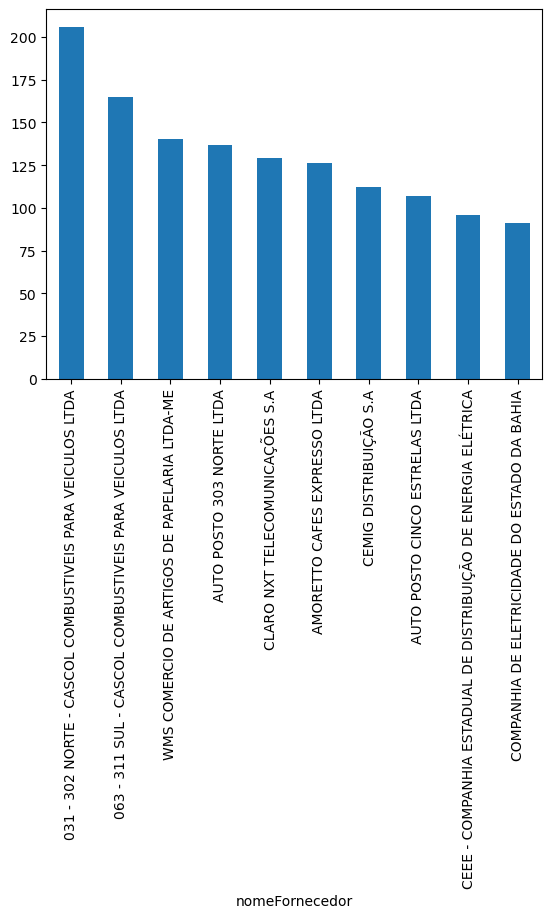

In [77]:
total.nomeFornecedor.value_counts()[:10].plot(kind='bar')